Raw JSON data
{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 20.12, 'feels_like': 19.13, 'temp_min': 19.44, 'temp_max': 21.06, 'pressure': 1015, 'humidity': 36, 'sea_level': 1015, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 9.26, 'deg': 90}, 'clouds': {'all': 5}, 'dt': 1746898209, 'sys': {'type': 2, 'id': 268730, 'country': 'GB', 'sunrise': 1746850579, 'sunset': 1746905852}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}
-  30
Weather in London
Temperature 20.12°C
Humidity 36%
Wind Speed 9.26 ms
Description clear sky
-30


<ipython-input-72-8792ff2853bb>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette=colors)


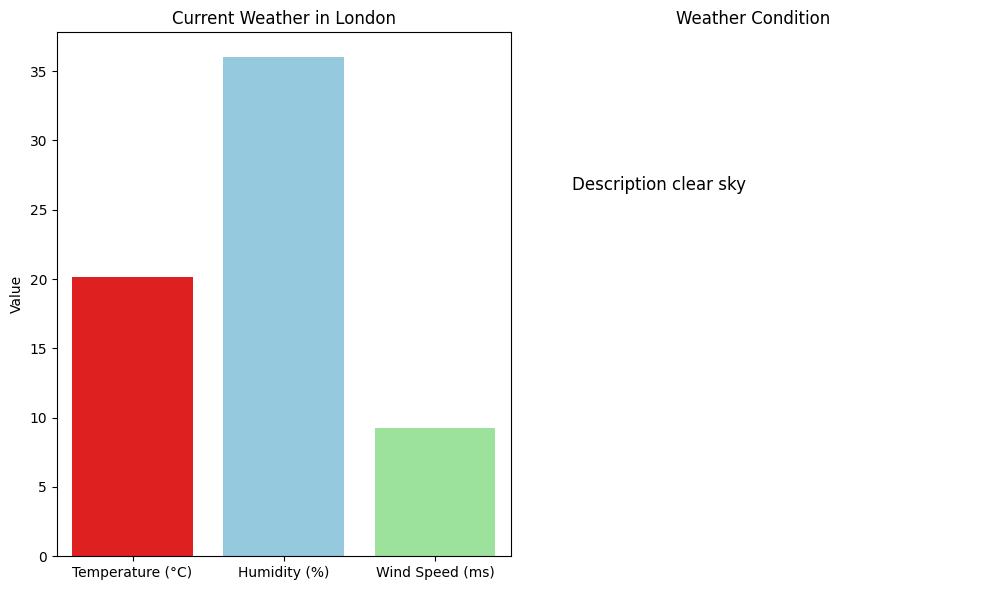

In [ ]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Often useful for working with data
# Step 1 Your API Key (replace with your actual key)
api_key ="73f10d96d371ce461de7aa9b4d0cdc69" # Example key, replace with your own
# Note: Make sure to keep your API key secure and not expose it in public repositories.
# Step 2 Define city and API endpoint
city_name = "London"  # Or any city you want to get data for
base_url = "https://api.openweathermap.org/data/2.5/weather?"
complete_url = base_url + "appid=" + api_key + "&q=" + city_name + "&units=metric"
try:

    # Step 3 Make the API request
    response = requests.get(complete_url)
    response.raise_for_status()  # Raise an exception for bad status codes

    # Step 4 Parse the JSON response
    data = response.json()
    print("Raw JSON data")
    print(data)
    print("-  30")
    # Step 5 Extract relevant data
    if data['cod'] != '404':
        main_data = data['main']
        temperature = main_data['temp']
        humidity = main_data['humidity']
        wind_speed = data['wind'].get('speed')  # Use .get() to handle potential missing key
        description = data['weather'][0]['description']

        print(f'Weather in {city_name}')
        print(f'Temperature {temperature}°C')
        print(f'Humidity {humidity}%')
        print(f'Wind Speed {wind_speed} ms')
        print(f'Description {description}')
        print(-  30)
        # Step 6 Create visualizations
        plt.figure(figsize=(10, 6))

        # Bar plot for numerical data
        metrics = ['Temperature (°C)', 'Humidity (%)', 'Wind Speed (ms)']
        values = [temperature, humidity, wind_speed]
        colors = ['red', 'skyblue', 'lightgreen']
        plt.subplot(1, 2, 1)
        sns.barplot(x=metrics, y=values, palette=colors)
        plt.title(f'Current Weather in {city_name}')
        plt.ylabel('Value')
        # Text annotation for description
        plt.subplot(1, 2, 2)
        plt.text(0.1, 0.7, f'Description {description}', fontsize=12)
        plt.axis('off')
        plt.title('Weather Condition')

        plt.tight_layout()
        plt.show()
    else:
        print(f'Error City \'{city_name}\' not found.')

except requests.exceptions.RequestException as e:
    print(f'An error occurred during the API request {e}')
except KeyError as e:
    print(f'Error Could not find key \'{e}\' in the JSON response. Check the API structure.')
except Exception as e:
    print(f'An unexpected error occurred {e}')